<a href="https://colab.research.google.com/github/Garry1970/Garry1970/blob/main/%D0%93%D0%BE%D1%81%D0%B4%D0%BE%D0%BB%D0%BD%20%D1%81%D1%88%D0%B0d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install matplotlib pandas seaborn

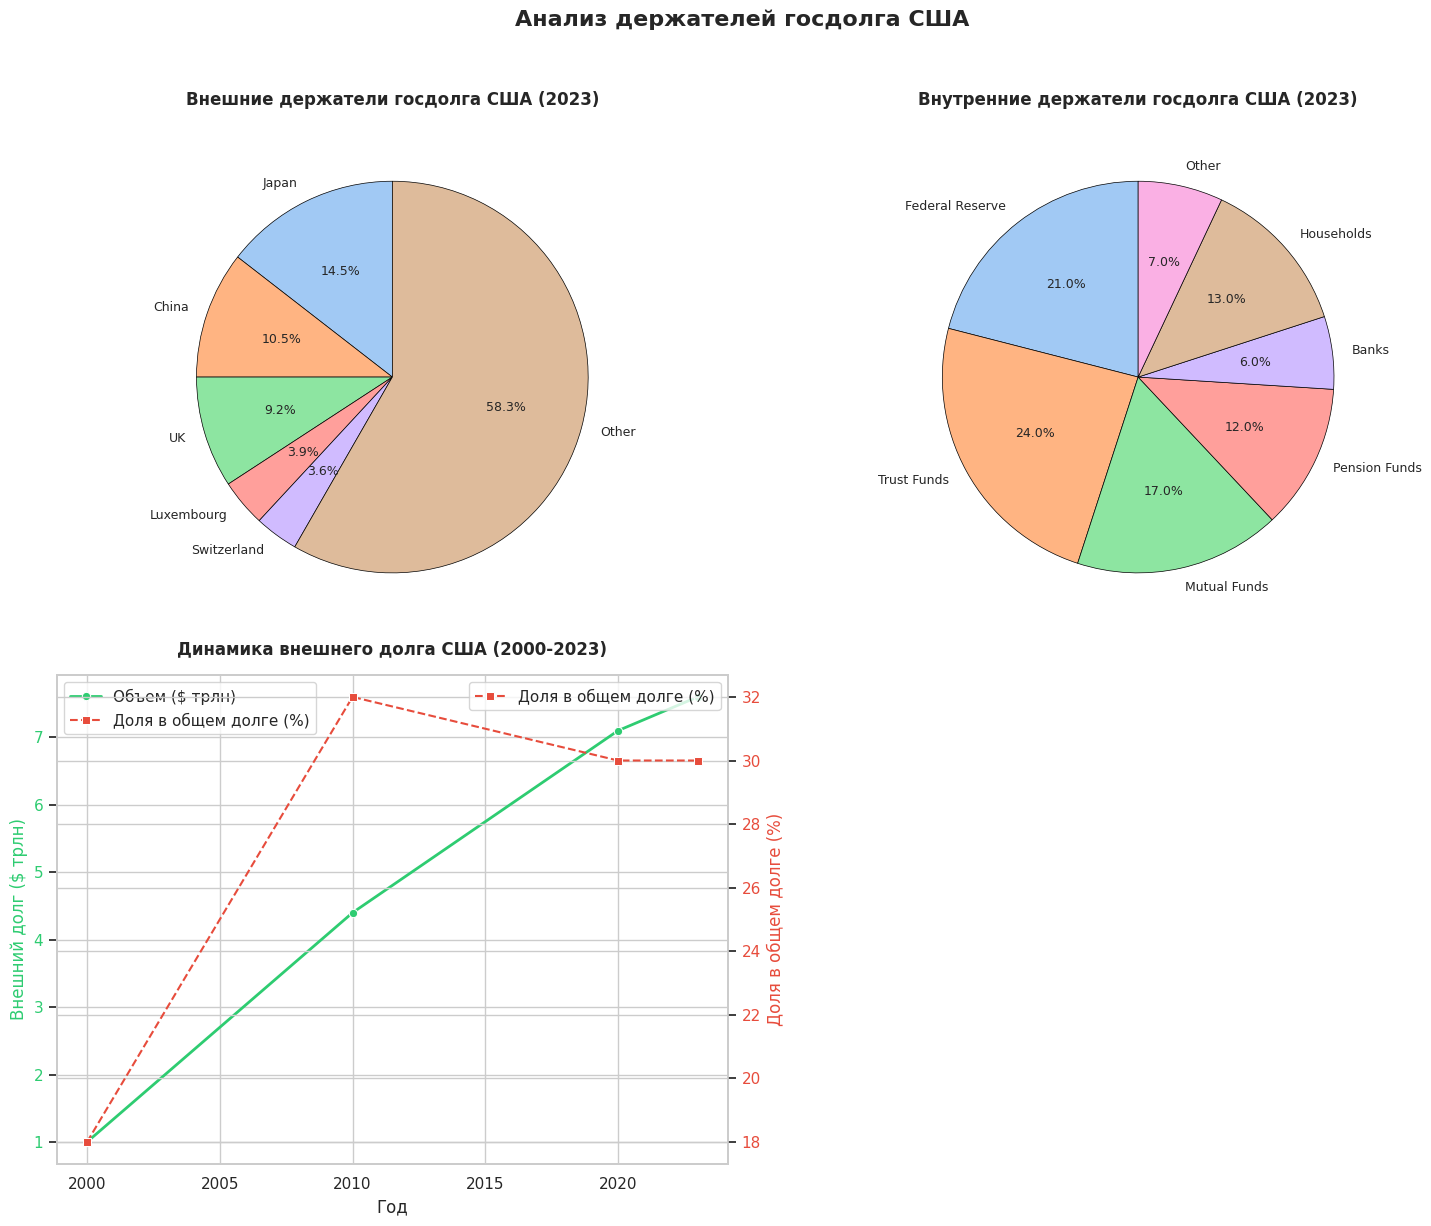

In [11]:
# Установка библиотек (выполнить в терминале перед запуском)
# pip install matplotlib pandas seaborn

import matplotlib.pyplot as plt  # PyPlot
import pandas as pd
import seaborn as sns  # Стилизация графиков

# Данные для внешних держателей (2023)
external_debt = {
    "Japan": 14.5,
    "China": 10.5,
    "UK": 9.2,
    "Luxembourg": 3.9,
    "Switzerland": 3.6,
    "Other": 58.3
}

# Данные для внутренних держателей (2023)
internal_debt = {
    "Federal Reserve": 21,
    "Trust Funds": 24,
    "Mutual Funds": 17,
    "Pension Funds": 12,
    "Banks": 6,
    "Households": 13,
    "Other": 7
}

# Динамика внешнего долга США (2000-2023)
years = [2000, 2010, 2020, 2023]
external_debt_trillion = [1.0, 4.4, 7.1, 7.6]
external_debt_share = [18, 32, 30, 30]

# Создаем DataFrame для временных рядов
df = pd.DataFrame({
    "Year": years,
    "External Debt ($ tn)": external_debt_trillion,
    "Share of Total (%)": external_debt_share
})

# Настройка стиля графиков через Seaborn
sns.set_theme(style="whitegrid", palette="pastel")  # Стиль и палитра

# Создаем фигуру с 3 графиками
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
((ax1, ax2), (ax3, ax4)) = axes  # Распределение осей
ax4.remove()  # Удаляем лишнюю ось

# График 1: Внешние держатели (круговая диаграмма)
ax1.pie(
    external_debt.values(),
    labels=external_debt.keys(),
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 0.5},
    textprops={"fontsize": 9}
)
ax1.set_title("Внешние держатели госдолга США (2023)", fontweight="bold", pad=20)

# График 2: Внутренние держатели (круговая диаграмма)
ax2.pie(
    internal_debt.values(),
    labels=internal_debt.keys(),
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black", "linewidth": 0.5},
    textprops={"fontsize": 9}
)
ax2.set_title("Внутренние держатели госдолга США (2023)", fontweight="bold", pad=20)

# График 3: Динамика внешнего долга (линейный график)
sns.lineplot(  # Используем Seaborn для улучшения стиля
    data=df, x="Year", y="External Debt ($ tn)",
    marker="o", color="#2ecc71", ax=ax3, linewidth=2,
    label="Объем ($ трлн)"
)
ax3.set_xlabel("Год")
ax3.set_ylabel("Внешний долг ($ трлн)", color="#2ecc71")
ax3.tick_params(axis="y", labelcolor="#2ecc71")

# Вторая ось для доли в общем долге
ax3_secondary = ax3.twinx()
sns.lineplot(
    data=df, x="Year", y="Share of Total (%)",
    marker="s", color="#e74c3c", ax=ax3_secondary, linestyle="--",
    label="Доля в общем долге (%)"
)
ax3_secondary.set_ylabel("Доля в общем долге (%)", color="#e74c3c")
ax3_secondary.tick_params(axis="y", labelcolor="#e74c3c")

# Объединяем легенды
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_secondary.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2, loc="upper left")

ax3.set_title("Динамика внешнего долга США (2000-2023)", fontweight="bold", pad=15)

# Общий заголовок
plt.suptitle("Анализ держателей госдолга США", fontsize=16, fontweight="bold", y=1.02)

# Настройка отступов
plt.tight_layout()

# Сохранение графиков
plt.savefig("us_debt_analysis_seaborn.png", dpi=300, bbox_inches="tight")

# Показать графики
plt.show()